# Boreal height CMIP6: examine median 36-year TCC trends
for set of hydrobasins in boreal, TTE, tundra study domain

In [3]:
import os
import glob
import pandas as pd
import geopandas as gpd
import contextily as ctx
import plotnine
from plotnine import *
from multiprocessing import Pool
from functools import partial

/tmp/ipykernel_979420/1560123008.py:4: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [75]:
ZONAL_DIR = '/home/pmontesa/mfrost2/projects/boreal_hcan/data/zonal_stats'

In [118]:
for f in glob.glob(ZONAL_DIR + '/*cog_zonalstats.gpkg'):
    if os.path.getsize(f) < 70 * 1024:
        print(f)
        os.remove(f)

/home/pmontesa/mfrost2/projects/boreal_hcan/data/zonal_stats/build_stack_7080162341_cog_zonalstats.gpkg
/home/pmontesa/mfrost2/projects/boreal_hcan/data/zonal_stats/build_stack_7080107060_cog_zonalstats.gpkg
/home/pmontesa/mfrost2/projects/boreal_hcan/data/zonal_stats/build_stack_7080149662_cog_zonalstats.gpkg
/home/pmontesa/mfrost2/projects/boreal_hcan/data/zonal_stats/build_stack_7080149951_cog_zonalstats.gpkg
/home/pmontesa/mfrost2/projects/boreal_hcan/data/zonal_stats/build_stack_7080162590_cog_zonalstats.gpkg
/home/pmontesa/mfrost2/projects/boreal_hcan/data/zonal_stats/build_stack_7080170111_cog_zonalstats.gpkg
/home/pmontesa/mfrost2/projects/boreal_hcan/data/zonal_stats/build_stack_7080170421_cog_zonalstats.gpkg
/home/pmontesa/mfrost2/projects/boreal_hcan/data/zonal_stats/build_stack_7080170422_cog_zonalstats.gpkg
/home/pmontesa/mfrost2/projects/boreal_hcan/data/zonal_stats/build_stack_7080170492_cog_zonalstats.gpkg
/home/pmontesa/mfrost2/projects/boreal_hcan/data/zonal_stats/bui

In [119]:
%%time
with Pool(processes=10) as pool:
    gdf_list = pool.map(partial(gpd.read_file), glob.glob(ZONAL_DIR + '/*cog_zonalstats.gpkg'))


CPU times: user 3.68 s, sys: 2.21 s, total: 5.9 s
Wall time: 47.9 s


In [120]:
len(gdf_list)

11293

In [121]:
zonal_smry_gdf = pd.concat(gdf_list + [gpd.read_file('/home/pmontesa/mfrost2/projects/boreal_hcan/data/hydrobasins_L08_patterns_tte_boreal_tundra_3995_tcc_trends_part1.gpkg')])

In [138]:
zonal_smry_gdf['area_sqkm'] = zonal_smry_gdf.geometry.area / 1e6
zonal_smry_gdf.head()

,index,HYBAS_ID,pattern_class,val_terrapulse_tcc_slope_max,val_terrapulse_tcc_slope_min,val_terrapulse_tcc_slope_median,val_terrapulse_tcc_slope_mean,val_terrapulse_tcc_slope_percentile_02,val_terrapulse_tcc_slope_percentile_25,val_terrapulse_tcc_slope_percentile_75,...,val_terrapulse_tcc_pvalue_min,val_terrapulse_tcc_pvalue_median,val_terrapulse_tcc_pvalue_mean,val_terrapulse_tcc_pvalue_percentile_02,val_terrapulse_tcc_pvalue_percentile_25,val_terrapulse_tcc_pvalue_percentile_75,val_terrapulse_tcc_pvalue_percentile_98,val_terrapulse_tcc_pvalue_count,geometry,area_sqkm
0,4503,7080019440,TTE (abrupt),None,None,NaN,None,None,None,None,...,None,None,None,None,None,None,None,0,"POLYGON ((-2925185.193 2438974.932, -2925007.8...",814.946071
0,4504,7080019800,TTE (abrupt),None,None,NaN,None,None,None,None,...,None,None,None,None,None,None,None,0,"POLYGON ((-2869178.841 2472242.657, -2867462.0...",1884.859245
0,10501,7080019841,Boreal Forest (taiga),None,None,NaN,None,None,None,None,...,None,None,None,None,None,None,None,0,"MULTIPOLYGON (((-2859622.820 2492156.102, -285...",1535.355003
0,10502,7080019842,Boreal Forest (taiga),None,None,NaN,None,None,None,None,...,None,None,None,None,None,None,None,0,"POLYGON ((-2830798.965 2420936.765, -2830841.4...",1243.048333
0,4505,7080019850,TTE (abrupt),None,None,NaN,None,None,None,None,...,None,None,None,None,None,None,None,0,"MULTIPOLYGON (((-2831134.205 2557128.955, -283...",2711.700697


In [139]:
zonal_smry_gdf.reset_index().to_crs(4326).to_file('/home/pmontesa/mfrost2/projects/boreal_hcan/data/hydrobasins_L08_patterns_tte_boreal_tundra_tcc_trends.gpkg', driver='GPKG')

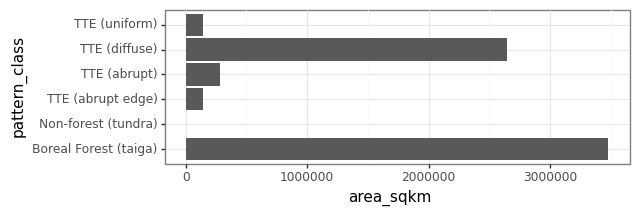

<ggplot: (1409609492363)>

In [140]:
(
    ggplot(zonal_smry_gdf.dropna())
    + geom_bar(aes(x='pattern_class', y='area_sqkm'), stat='identity')
    + coord_flip()
    + theme_bw()
    + theme(figure_size=(6,2))
)

/home/pmontesa/.local/lib/python3.8/site-packages/plotnine/layer.py:333: PlotnineWarning: stat_boxplot : Removed 2583 rows containing non-finite values.


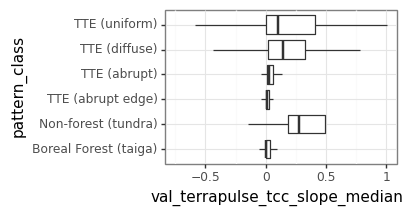

<ggplot: (1409238122885)>

In [125]:
zonal_smry_gdf["val_terrapulse_tcc_slope_median"] = zonal_smry_gdf.val_terrapulse_tcc_slope_median.astype(float)
(
    ggplot(zonal_smry_gdf)
    + geom_boxplot(aes(x='pattern_class', y='val_terrapulse_tcc_slope_median', fill='val_terrapulse_tcc_slope_count'), outlier_shape = '')
    + theme_bw()
    + theme(figure_size=(9,3))
    + coord_cartesian(ylim=(-0.75,1))
    + coord_flip(ylim=(-0.75,1))
    + theme(figure_size=(3,2))
)

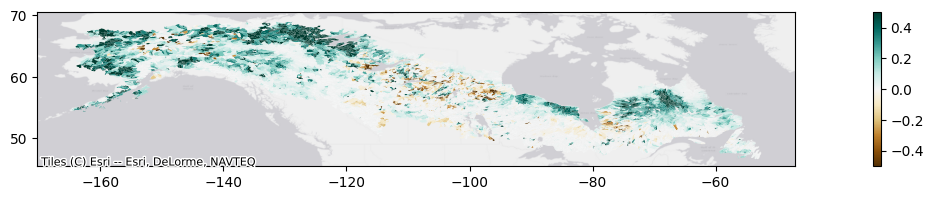

In [91]:
ax = zonal_smry_gdf.to_crs(4326).plot(column='val_terrapulse_tcc_slope_median', cmap='BrBG', legend=True, vmin=-0.5, vmax=0.5, figsize=(20,2))
ax = ctx.add_basemap(ax=ax, crs=4326, source = ctx.providers.Esri.WorldGrayCanvas)